本文学习于:
1. [sklearn-UserGuide-preprocessing](http://sklearn.apachecn.org/#/docs/59)
2. [预处理数据的方法总结](https://blog.csdn.net/weixin_40807247/article/details/82793220)
3. [数据的中心化和标准化](https://blog.csdn.net/lilong117194/article/details/78561013)

编辑:Weiyang,Time:2019.2.17,weixin:damo894127201

**sklearn.preprocessing**包提供了几个常见的实用功能和转换器类型，用来将原始特征向量更改为更适合机器学习模型的形式。一般来说，机器学习算法受益于数据集的标准化。如果数据集中存在一些离群值，那么稳定的缩放或转换更合适。

当我们拿到一批原始的数据:
1. 首先要明确有多少特征，哪些是连续的，哪些是离散的或类别的
2. 检查有没有缺失值，对缺失的特征，选择恰当方式进行弥补，使数据完整
3. 对连续的数值型特征进行标准化，使得均值为0，方差为1
4. 对类别型的特征进行one-hot编码
5. 将需要转换成类别型数据的连续型数据进行二值化
6. 为防止过拟合或者其他原因，选择是否要将数据进行正则化
7. 在对数据进行初探之后发现效果不佳，可以尝试使用多项式方法，寻找非线性的关系
8. 根据实际问题分析是否需要对特征进行相应的函数转换

# 标准化

数据集的标准化对scikit-learn中实现的大多数机器学习算法来说是常见的要求。如果个别特征或多或少看起来不是很像标准正态分布(具有零均值和单位方差)，那么它们的表现力可能会较差。

许多机器学习算法中的目标函数的基础都是假设所有的特征都是零均值并且具有同一阶数上的方差。标准化的原因在于如果有些特征的方差比其他特征大几个数量级，那么它就会在学习算法中占据主导位置，导致学习器并不能像我们所期望的那样，从其它特征中学习。

数据集的标准化:将特征数据的分布调整成标准正态分布，也叫高斯分布，也就是使得数据的均值为0，方差为1.

标准化的过程为两步：
1. 去均值的中心化（均值变为0）
2. 方差的规模化（方差变为1）

## 数据的中心化和标准化

数据中心化和标准化在回归分析中，可以去除由于量纲不同、自身变异或数值相差较大所引起的误差。

在一些实际问题中，我们得到的样本数据都是多个维度的，即一个样本是用多个特征来表征的。很显然，这些特征的量纲和数值的量级都是不一样的，而通过标准化处理，可以使得不同的特征具有相同的尺度（Scale）。这样，在学习参数的时候，不同特征对参数的影响程度就一样了。简言之，当原始数据不同维度上的特征的尺度（单位）不一致时，需要标准化步骤对数据进行预处理。

在回归问题和一些机器学习算法中，以及训练神经网络的过程中，还有PCA等通常需要对原始数据进行中心化（Zero-centered或者Mean-subtraction）处理和标准化（Standardization或Normalization）处理。

### 中心化(zero-centered或mean-subtraction)

中心化:指变量减去它的均值，因此这会使得新数据的均值为0.对于变量是向量的数据而言，中心化指向量中各个分量分别减去相应分量的均值。

### 标准化:也叫z-score标准化

标准化:指变量减去它的均值，再除以它的标准差。

通过标准化的处理，可以得到均值为0，方差为1的服从标准正态分布的数据。

### 中心化，标准化的目的

1. 标准化:通过标准化可以使数据的各个特征（各个维度）有相同的尺度，比如，在神经网络的训练中，标准化能使参数更快收敛
2. 中心化:对数据进行中心化预处理，这样做的目的是要增加基向量的正交性

### 通过图来比较原始数据，中心化后的数据以及标准化后的数据之间的差异

#### 构造伪数据

In [1]:
import numpy as np
from sklearn.datasets import make_blobs

# 构造伪数据
X = np.random.rand(1000) # 构造横轴数据
Y = 2*X + np.random.rand(1000) + 20 # 构造纵轴数据
# 构造聚类数据
#X,_ = make_blobs(n_samples=700, n_features=2,centers=2,cluster_std=[30.3,18.3],random_state=2)
#X,Y = X[:,0],X[:,1]

#### 对数据进行中心化

In [2]:
X_centered = X - X.mean()
Y_centered = Y - Y.mean()

#### 对数据进行标准化

In [3]:
from sklearn import preprocessing

X_normalized = preprocessing.scale(X)
Y_normalized = preprocessing.scale(Y)

#### 作图比较

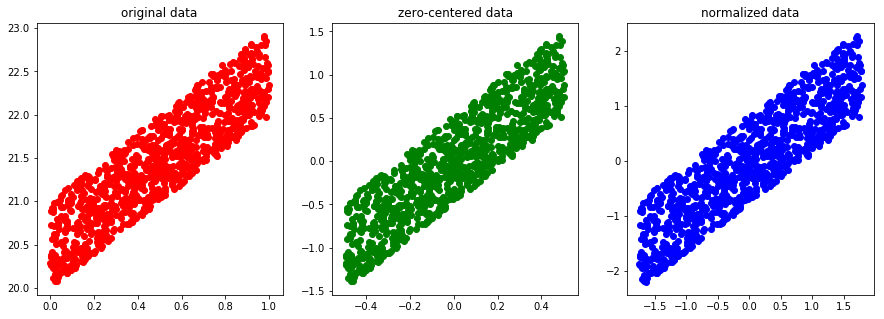

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax1.scatter(X,Y,c='r')
plt.title('original data')

ax2 = fig.add_subplot(1,3,2)
ax2.scatter(X_centered,Y_centered,c='g')
plt.title('zero-centered data')

ax3 = fig.add_subplot(1,3,3)
ax3.scatter(X_normalized,Y_normalized,c='b')
plt.title('normalized data')
plt.show()

实在是构造不出来特别能显示原数据，中心化后的数据，标准化后的数据之间的差异的数据，就再放一张图:
![original_zero_stad](./image/original_zero_stad.jpg)

## Z-Score标准化：均值变为0，方差变为1

### 构造伪数据

In [5]:
from sklearn import preprocessing
import numpy as np

# 构造伪数据，行表示一条数据，列表示一个特征
X_train = np.array([
    [1.,-1.,2.],
    [2.,0.,0.],
    [0.,1.,-1.]
])

### preprocessing.scale:标准化

In [6]:
# 标准化
X_scaled = preprocessing.scale(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

### 查看缩放后的数据的均值和方差

In [7]:
X_scaled.mean(axis=0),X_scaled.std(axis=0) # axis=0表示按列的方向分别计算数据中各个分量的均值和方差

(array([0., 0., 0.]), array([1., 1., 1.]))

### 在新的数据集上实现和原数据集相同的标准化操作(缩放操作)：preprocessing.StandardScaler

主要应用于，让测试集和训练集具有相同的标准化，即使用训练集的平均值和标准偏差来标准化。

#### 在原数据集上标准化

In [8]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

缩放器(scaler)的属性:训练数据各个分量的均值

In [9]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

缩放器(scaler)的属性:训练数据各个分量的标准差

In [10]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

对训练数据进行标准化

In [11]:
scaler.transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

#### 在新数据集上实现相同的标准化

可以通过查看缩放器(scaler)的属性,来观察缩放器在训练集中学习到的转换操作的基本性质。

In [12]:
X_test = np.array([[-1.,1.,0.]])
scaler.transform(X_test)

array([[-2.44948974,  1.22474487, -0.26726124]])

## 将特征缩放至特定范围内

一种标准化是
1. **将特征缩放到给定的最小值和最大值之间**，通常在0和1之间，使用**MinMaxScaler**
2. **将每个特征的最大绝对值转换至单位大小**，即将每个特征除以其相应的最大绝对值，使得数据在[-1,1]之间，使用**MaxAbsScaler**

使用这种缩放的目的
1. 实现特征极小方差的鲁棒性
2. 在稀疏矩阵中保留零元素

### preprocessing.MinMaxScaler

将数据压缩到[0,1]范围内,参数feature_range=(min,max)表示缩放到的最小值和最大值的范围，其公式为:
$$X_{std} = \frac{X - X.min(axis=0)}{X.max(axis=0) - X.min(axis=0)}$$

$$X_{scaled} = X_{std} * (max - min) + min$$

注意:
1. min 和 max 是你给定的最小值和最大值
2. X.min 和 X.max 是相应数据的最小值和最大值

对训练数据集实现缩放操作

In [13]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

将该标准化应用到测试集上，实现与训练集一致的标准化操作

In [14]:
X_test = np.array([[-3.,-1.,4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

### preprocessing.MaxAbsScaler

MaxAbsScaler通过除以每个特征的最大值将训练数据特征缩放至 [-1, 1] 范围内，这就意味着，训练数据应该是已经零中心化或者是稀疏数据。 

在训练集上使用

In [15]:
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

在测试集上使用相同的缩放操作

In [16]:
X_test = np.array([[-3.,-1.,4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs

array([[-1.5, -1. ,  2. ]])

## 缩放稀疏数据

中心化稀疏(矩阵)数据会破坏数据的稀疏结构，因此很少有一个比较明智的实现方式。但是缩放稀疏输入是有意义的，尤其是当几个特征在不同的量级范围时。

**MaxAbsScaler**是专为**缩放数据**而设计的，并且是缩放数据的推荐方法。但是，**scale** 和 **StandardScaler **也能够接受**scipy.sparse**作为输入，只要参数**with_mean=False**被准确传入它的构造器,否则会出现**ValueError**的错误，因为默认的中心化会破坏稀疏性，并且经常会因为分配过多的内存而使执行崩溃。 

## 缩放有离群值的数据

如果你的数据包含许多异常值，使用**均值和方差缩放**可能并不是一个很好的选择。这种情况下，你可以使用 **robust_scale**以及**RobustScaler**作为替代品。它们对你的数据的中心和范围使用更有鲁棒性的估计。

**Scaling vs Whitening**有时候独立地中心化和缩放数据是不够的，因为下游的机器学习模型能够对**特征之间的线性依赖**做出一些假设(这对模型的学习过程来说是不利的)。

要解决这个问题，你可以使用**sklearn.decomposition.PCA**或**sklearn.decomposition.RandomizedPCA**并指定参数**whiten=True**来更多**移除特征间的线性关联**。

## 核矩阵的中心化

如果你有一个核矩阵**K**，它计算由函数$phi$定义的特征空间的点积，那么一个**KernelCenterer**类能够转化这个核矩阵，通过移除特征空间的平均值，使它包含由函数$phi$定义的内积.

# 非线性转换

## numpy.percentile的使用

```Python
numpy.percentile(a,q,axis)
```
参数:
1. a:输入的数组
2. q:要计算的百分位，在0-100之间
3. axis:沿着某个轴的方向计算百分位，如果a是二维的，则取值的为0,1

用途:找到q中对应的分位数值，常用于离群点检测

## 将数据映射到均匀分布

类似于缩放scale，**QuantileTransformer(分位转换器)**类将**每个特征缩放在相同的范围或分布下**。但是，**通过执行一个秩转换能够使异常的分布平滑化，并且能够比缩放更少地受到离群值的影响**，但是它的确使特征间及特征内的关联和距离失真了。

**QuantileTransformer**类以及**quantile_transform**函数提供了一个**基于分位数函数的无参数转换**，将数据映射到了0到1的**均匀分布**上。

In [17]:
from sklearn import preprocessing
import numpy as np

X_train = np.random.rand(300,10)
X_test = np.random.rand(100,10)
# 将转换后的数据映射到 均匀分布，n_quantiles分位数的个数
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles=100,
                                                         output_distribution='uniform',
                                                         random_state=0)
X_train_trans = quantile_transformer.fit_transform(X_train)

输出原数据和转换后的数据对应的百分位数值

In [18]:
print('原数据:',np.percentile(X_train[:,0],[0,25,50,75,100]))
print('转换后的数据:',np.percentile(X_train_trans[:,0],[0,25,50,75,100]))

原数据: [0.00323652 0.23420113 0.51530417 0.73769235 0.99641468]
转换后的数据: [9.99999998e-08 2.48570026e-01 5.00668314e-01 7.49825871e-01
 9.99999900e-01]


相同的转换应用于新数据集

In [19]:
X_test_trans = quantile_transformer.transform(X_test)
print('原数据:',np.percentile(X_test[:,0],[0,25,50,75,100]))
print('转换后的数据:',np.percentile(X_test_trans[:,0],[0,25,50,75,100]))

原数据: [0.00665882 0.28423688 0.54611892 0.78139776 0.98638598]
转换后的数据: [0.00451865 0.31247942 0.54315113 0.78522533 0.99081115]


## 将数据映射到高斯分布

只需要将preprocessing.QuantileTransformer()的参数output_distribution设置为'normal'即可

# 归一化

如果你计划使用二次形式(如点积或任何其他核函数)来量化任何样本间的**相似度**，则此过程将非常有用。

## 归一化normalization和标准化Standardization的区别

**归一化**是将有量纲的表达式，经过变换，化为无量纲的表达式，即标量。具体而言，归一化就是将某条数据的每个分量除以该数据所有分量的和(L1范式)或平方和(L2范式)。

**标准化**是将多条数据转化为标准正态分布的过程，即每条数据都减去均值，再除以标准差。如果每条数据有多个分量，则这一过程针对每个分量，即每个分量都减去该分量的均值，再除以该分量的标准差。

例如，对于数据x = [1,2,3]：:
1. L1归一化为:$ x_{'} = \frac{\left [1,2,3 \right]}{1+2+3} $
2. L2归一化为:$ x_{'} = \frac{\left [1,2,3 \right]}{1*1+2*2+3*3} $

## preprocessing.normalize(data,norm)

In [20]:
from sklearn import preprocessing

X = np.array([
    [1.,-1.,2.],
    [2.,0.,0.],
    [0.,1.,-1.]
])

L1归一化

In [21]:
X_l1 = preprocessing.normalize(X,norm='l1')
X_l1

array([[ 0.25, -0.25,  0.5 ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.5 , -0.5 ]])

L2归一化

In [22]:
X_l2 = preprocessing.normalize(X,norm='l2')
X_l2

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

# 二值化：特征二值化

**特征二值化**是**将数值特征用阈值过滤得到布尔值**的过程

In [23]:
from sklearn import preprocessing

binarizer = preprocessing.Binarizer(threshold=0.1)
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

# 分类特征编码:OneHot编码

在机器学习中，特征经常不是数值型的而是分类型的。

举个例子，一个人可能有 ["male","female"],["from Europe","from US","from Asia"],["uses Firefox", "uses Chrome","uses Safari","uses Internet Explorer"] 等分类的特征。这些特征能够被有效地编码成整数，比如 ["male","from US","uses Internet Explorer"] 可以被表示为 [0, 1, 3] ， ["female","from Asia","uses Chrome"] 表示为 [1, 2, 1] 。

一种将分类特征转换为能够被scikit-learn中模型使用的编码是**one-hot编码**，在**OneHotEncoder**中实现。这个类使用**m**个可能值转换为**m**值化特征，将分类特征的每个元素转化为一个值。

既可用于对类别特征编码，又可用于对 类别标签编码

## 根据输入数据自动推断各个类别特征有多少个

In [24]:
from sklearn import preprocessing

# 输入四条数据，每条数据每个维度代表了一个类别特征，其取值为相应的类别编码
# 比如某个类别特征有3种取值，则编码为0,1,2
X = [
    [0,0,3], # 数据1
    [1,1,0], # 数据2
    [0,2,1], # 数据3
    [1,0,2]  # 数据4
]

enc = preprocessing.OneHotEncoder()
enc.fit(X)

/home/weiyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

对新数据[0,1,3]进行onehot编码

In [25]:
enc.transform([[0,1,3]]).toarray()

array([[1., 0., 0., 1., 0., 0., 0., 0., 1.]])

前两个数，即1,0 代表第一个维度类别特征的编码；其后的3个数，即0,1,0 代表第二个维度类别特征的编码；最后4个数，即0,0,0,1 代表了第三个类别特征的编码

## 指定每个类别特征的个数

指定参数n_values的值即可，它是一个列表，每个分量的取值代表了相应维度的特征的取值种类

In [26]:
enc = preprocessing.OneHotEncoder(n_values=[2, 3, 4])
enc.fit([[1, 2, 3], [0, 2, 0]])

/home/weiyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:331: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=[2, 3, 4], sparse=True)

对新数据[0,1,3]进行onehot编码

In [27]:
enc.transform([[0,1,3]]).toarray()

array([[1., 0., 0., 1., 0., 0., 0., 0., 1.]])

## 对类别标签编码

In [28]:
enc = preprocessing.OneHotEncoder(n_values=[3]) # 3种类别
# 3条数据的标签
X = [
    [1],
    [0],
    [2],
]
enc.fit(X)

/home/weiyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:331: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)]'.
  warnings.warn(msg, DeprecationWarning)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error', n_values=[3],
       sparse=True)

对新数据编码

In [29]:
enc.transform([[0],[1]]).toarray()

array([[1., 0., 0.],
       [0., 1., 0.]])

# 缺失值插补

因为各种各样的原因，真实世界中的许多数据集都包含缺失数据，这类数据经常被编码成**空格**、**NaNs**，或者是**其他的占位符**。但是这样的数据集并不能被scikit-learn学习算法兼容，因为**大多的学习算法都默认假设数组中的元素都是数值，因而所有的元素都有自己的意义**。 **使用不完整的数据集**的一个基本策略就是**舍弃掉整行或整列包含缺失值的数据**。但是这样就付出了**舍弃可能有价值数据（即使是不完整的 ）的代价**。 **处理缺失数值**的一个更好的策略就是**从已有的数据推断出缺失的数值**。

**Imputer**类提供了估算缺失值的基本策略，**使用缺失值所在的行/列中的平均值、中位数或者众数来填充**。这个类也支持不同的缺失值编码。

以下代码段演示了如何使用包含缺失值的列(轴0)的**平均值来**替换编码为 **np.nan**的缺失值:

In [30]:
import numpy as np
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN',strategy='mean',axis=0) # axis=0表示按列方向

/home/weiyang/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


 输入原数据,可以计算出各列的平均值，比如第一列的均值为:(1+7)/2=4 第二列的均值为:(2+3+6)/3=3.6666

In [31]:
imp.fit([[1,2],[np.nan,3],[7,6]])

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

对新数据应用与原数据相同的插补操作

In [32]:
X = [[np.nan,2],[6,np.nan],[7,6]]
imp.transform(X)

array([[4.        , 2.        ],
       [6.        , 3.66666667],
       [7.        , 6.        ]])

# 生成多项式特征

在机器学习中，通过**增加一些输入数据的非线性特征**来增加模型的复杂度通常是有效的。一个简单通用的办法是使用**多项式特征**，这可以获得特征的更高维度和互相间关系的项。这在**PolynomialFeatures**中实现,它**生成原有特征的多项式特征和交叉项特征**。

**sklearn.preprocessing.PolynomialFeatures(degree,interaction_only,include_bias)**参数介绍:
1. degree:整数，生成的多项式最大的次方，默认是2次方
    1. 例如，有如下特征$\left[X_{1},X_{2} \right ]$,如果degree=2,则会生成如下新的特征:
    $$\left[1,X_{1},X_{2},X_{1}^{2},X_{1}X_{2},X_{2}^{2} \right ]$$
2. interaction_only:默认为False,如果为True，则表示新特征只有交叉项:
    1. 例如，有如下特征$\left[X_{1},X_{2} \right ]$,如果interaction_only=True,则会生成如下新的特征:
    $$\left [ 1,X_{1},X_{2},X_{1}X_{2} \right ]$$
3. include_bias:默认为True,表示包含截距项，会单独给截距项一个特征列，值为所有原有特征0幂的乘积，即1

## 生成二次方的多项式特征

In [33]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(6).reshape(3,2) # 生成3条数据，每条数据2个特征
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [34]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

## 只生成交叉项特征

In [35]:
poly = PolynomialFeatures(degree=2,interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

# 自定义转换器

在机器学习中，想要将一个已有的Python函数作为一个转换器来协助数据清理或处理,通俗来讲，就是**把原始特征放进一个函数中做转换，经过这个函数处理后，新生成的值作为新的特征**，比如将特征做**log变换**，做**倒数变换**。可以使用**FunctionTransformer**从任意函数中实现一个转换器。

## 数据平滑处理的两个函数:np.log1p() 和 np.exmp1()

1. np.log1p()：相当于$ln(x + 1)$
2. np.exmp1():是np.log1p()的逆运算，相当于$e^{x} - 1$

1. np.log1p将数据压缩到了一个较小的区间，同样不会出现原数据因为较小而变为0的情况，便于对那些数据之间数量级相差较大的数据处理
2. np.exmp1将数据扩张到了一个较大的区间，便于对那些数据较小的特征进行处理

In [36]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
X = np.array([[0,1],[2,3]])
transformer.transform(X)

/home/weiyang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])